In [1]:
from IPython.display import Image
import pandas
import numpy
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

plt.rcParams["figure.figsize"]=[8,8]
numpy.random.seed(42)

In [2]:
#Comprension de datos
#SVD puede ser utilizado para comprimir imagenes, extrayendo aquellos componentes que son fundamentales a la hora de representar lo que hay en las imagenes y eliminando el resto (el ruido)

#se usara el dataset LAbeled Faces in the Wild (LFW) que contiene un conjunto de imagenes de personajes famosos enfocado al reconocimiento facial

In [3]:
from sklearn.datasets import fetch_lfw_people

In [4]:
caras=fetch_lfw_people(min_faces_per_person=15,resize=0.6)
caras.images=caras.images[:10]
caras.target=caras.target[:10]

In [5]:
caras.target_names[caras.target]

array(['David Beckham', 'Hans Blix', 'Donald Rumsfeld', 'Tom Daschle',
       'Alejandro Toledo', 'Donald Rumsfeld', 'Tony Blair',
       'Michael Bloomberg', 'Gerhard Schroeder', 'Ricardo Lagos'],
      dtype='<U25')

In [6]:
caras.target

array([16, 28, 18, 87,  1, 18, 90, 62, 22, 76], dtype=int64)

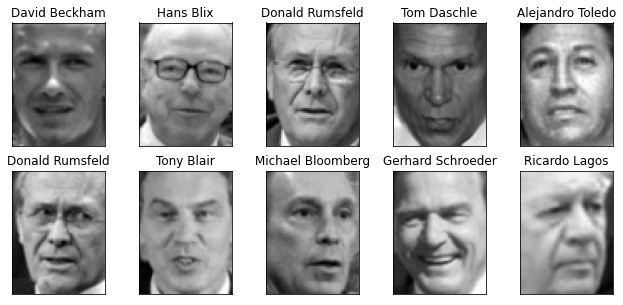

In [7]:
image_shape=caras.images[0].shape 
def dibujar_caras(array_caras):
    fig, axes=plt.subplots(2,5, figsize=(11,5), subplot_kw={"xticks": (), "yticks": ()})
    for target, image, ax in zip(caras.target, array_caras, axes.ravel()):
        ax.imshow(image, cmap="gray")
        ax.set_title(caras.target_names[target])

dibujar_caras(caras.images)

In [8]:
def dibujar_cara(matriz_cara):
    plt.figure(figsize=(12,6))
    plt.imshow(matriz_cara, cmap="gray")

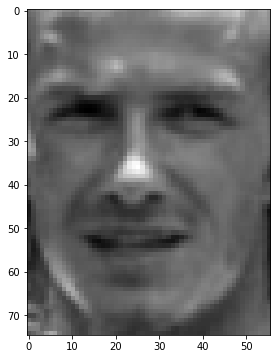

In [9]:
dibujar_cara(caras.images[0])

In [10]:
def kb_totales(*arrays):
    return sum(map(lambda a: a.nbytes, arrays))/1024

In [11]:
#ahora podemos usar esta funcion para calcular el tamaño en memoria de cualquier numero de arrays de numpy

In [12]:
kb_totales(caras.images[0])

16.40625

In [13]:
from scipy.linalg import svd

In [14]:
U, s, V=numpy.linalg.svd(caras.images[0], full_matrices=True)

In [15]:
U.shape, s.shape, V.shape

((75, 75), (56,), (56, 56))

In [16]:
#Vemos que el metodo svd no devuelve la matriz de valores singulares sigma como matriz, sino como vector (el resto de elementos son 0). La convertimos a una matriz diagonal

In [17]:
S=numpy.zeros((U.shape[0], V.shape[0]))
S[:V.shape[0], :V.shape[0]]=numpy.diag(s)
S.shape

(75, 56)

In [18]:
#Podemos recomponer la imagen original haciendo el producto de las matrices U, S, y V

In [19]:
cara_svd=U @ S @ V

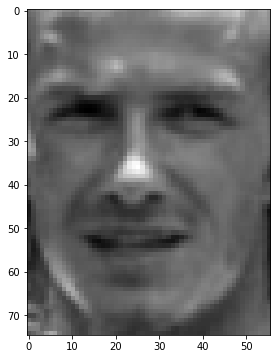

In [20]:
dibujar_cara(caras.images[0])

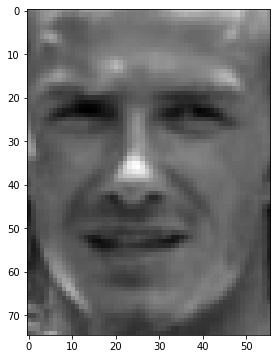

In [21]:
dibujar_cara(cara_svd)

In [22]:
kb_totales(U, s, V)

34.44140625

In [23]:
#ocupa mas espacio, sin embargo hemos realizado una descomposicion total (full SVD)

#se puede descomponer usando u numero especifico de valores singulares K que sea menor que d y utilizarlos para recomponer la imagen a costa de perder algo de informacion

In [24]:
from ipywidgets import IntSlider, interact

In [25]:
import sys
!{sys.executable} -m pip install ipywidgets

In [26]:
@interact(k=IntSlider(56, min=1, max=56))

def evaluar_k_imagen(k):
    U_k=U[:, :k]
    s_k=s[:k]
    V_k=V[:k, :]
    memoria_k=kb_totales(U_k, s_k, V_k)
    #calculamos la reduccion en tamaño respecto a la imagen original
    pct_reduccion=100*(1-(memoria_k/16.40))

    imagen_k_svd=U_k @ numpy.diag(s_k) @ V_k
    dibujar_cara(imagen_k_svd)
    plt.title("{} valores singulares, tamaño: {:.1f} kb ({:.1f}% menor)".format(k, memoria_k, pct_reduccion), size=20)
    plt.show()

interactive(children=(IntSlider(value=56, description='k', max=56, min=1), Output()), _dom_classes=('widget-in…